# Cleaning and Preprocessing data

<h3>Step 1: Importing necessary libraries, loading the dataset and analyzing the nature and information of the dataset </h3>

In [23]:
# Importing libraries
import pandas as pd
import numpy as np

In [24]:
# Loading the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
# It will print first few samples from the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# This will generate the information regarding the different columns present in dataset, their types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# This will print the statistical summary of the numerical columns only
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# This will print the total number of null values if present and also their datatypes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# This will print the total sum of duplicated rows if present in the dataset.
df.duplicated().sum()

0

In [30]:
# Filling missing values

# Calculating and filling the median values for numerical variables
for col in ['Age']:
    df.fillna({col: df[col].median()}, inplace=True)

# Calculating and filling the mode values for categorical variables
for col in ['Cabin', 'Embarked']:
    df.fillna({col: df[col].mode() [0]}, inplace=True)

# Dropping cabin feature the missing values is nearly to the total rows and also passengerId because it doesnot contribute to the model training and testing.
df.drop(columns=['Cabin','PassengerId'], inplace=True)

In [31]:
# Crosschecking the null values
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<h3> Step 2: Identifying the outliers present in the dataset and removing them and saving them into new csv file</h3>

In [32]:
import matplotlib.pyplot as plt

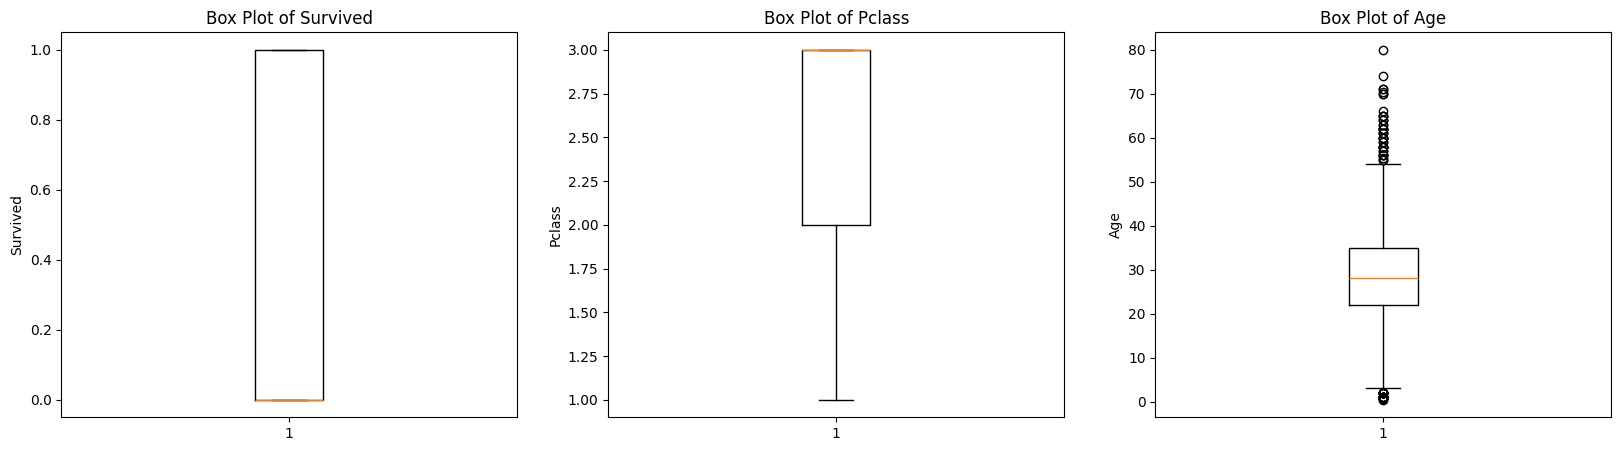

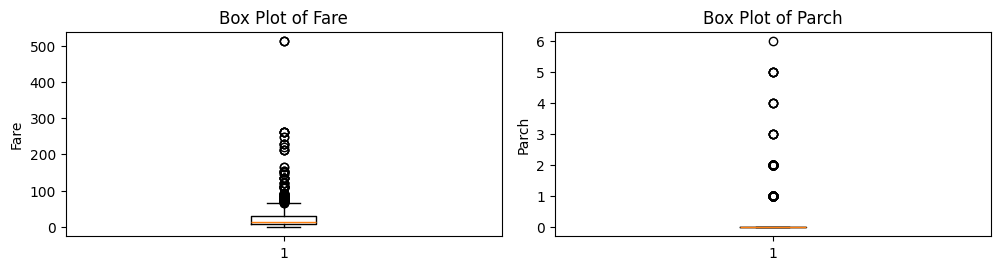

In [33]:
# Creating a boxplot
plt.figure(figsize=(20,5))

# 1st subplot
plt.subplot(1,3,1) #Rows, columns, position
plt.boxplot(df['Survived'])
plt.title('Box Plot of Survived')
plt.ylabel('Survived')

# 2nd subplot
plt.subplot(1,3,2) #Rows, columns, position
plt.boxplot(df['Pclass'])
plt.title('Box Plot of Pclass')
plt.ylabel('Pclass')

# 3rd subplot
plt.subplot(1,3,3) #Rows, columns, position
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Creating a boxplot
plt.figure(figsize=(15,5))

# 4th subplot
plt.subplot(2,3,1) #Rows, columns, position
plt.boxplot(df['Fare'])
plt.title('Box Plot of Fare')
plt.ylabel('Fare')

# 5th subplot
plt.subplot(2,3,2) #Rows, columns, position
plt.boxplot(df['Parch'])
plt.title('Box Plot of Parch')
plt.ylabel('Parch')

plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# It will help to remove the outlier  if present in the columns.
import pandas as pd
import numpy as np
from scipy import stats

# List of columns you want to remove outliers from and i have taken 3 features only because i found outliers in them and considered them as important features to make predictions.
list_columns = ['Age', 'Fare', 'Parch']

# Calculate Z-scores for the specified columns
z_scores = stats.zscore(df[list_columns])

# Define the threshold for Z-scores
threshold = 3

# Create a mask for rows where all column Z-scores are within the threshold
mask = ((z_scores < threshold) & (z_scores > -threshold)).all(axis=1)

# Filter the DataFrame to keep only the rows without outliers
df_no_outliers = df[mask]

# Print the DataFrame with no outliers
print(df_no_outliers)


     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0      male  22.0

In [34]:
# Saving the cleaned dataset into csv format
df_no_outliers.to_csv('Titanic_cleaned.csv', index=False)
print("Data saved in csv format")

Data saved in csv format


<h3>Step 3: Visualizing the dataset using Exploratory Data Analysis</h3>

In [35]:
# Visualizing the Features
import seaborn as sns

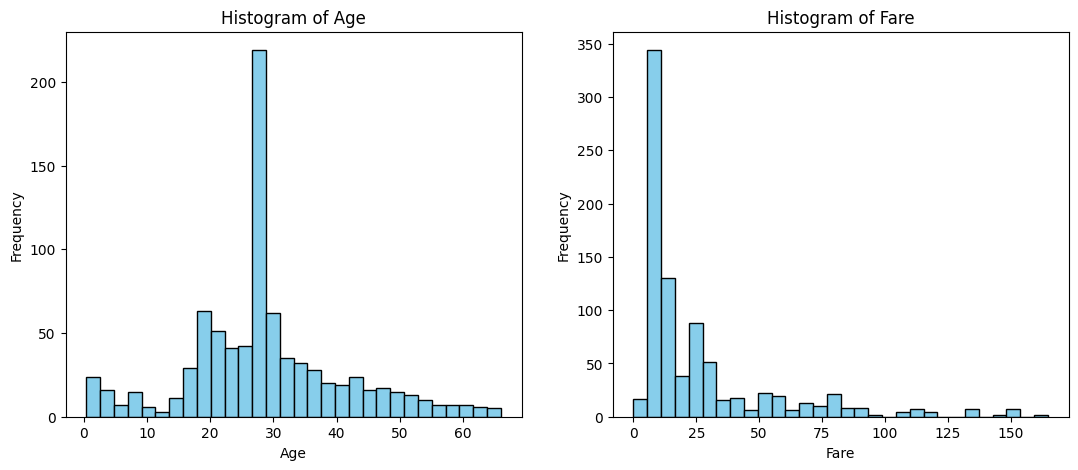

In [36]:
# Create histogram
plt.figure(figsize=(20,5))

# Histrogram(1st subplot)
plt.subplot(1,3,1)
plt.hist(df_no_outliers['Age'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histrogram(2nd subplot)
plt.subplot(1,3,2)
plt.hist(df_no_outliers['Fare'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Show plot
plt.show()

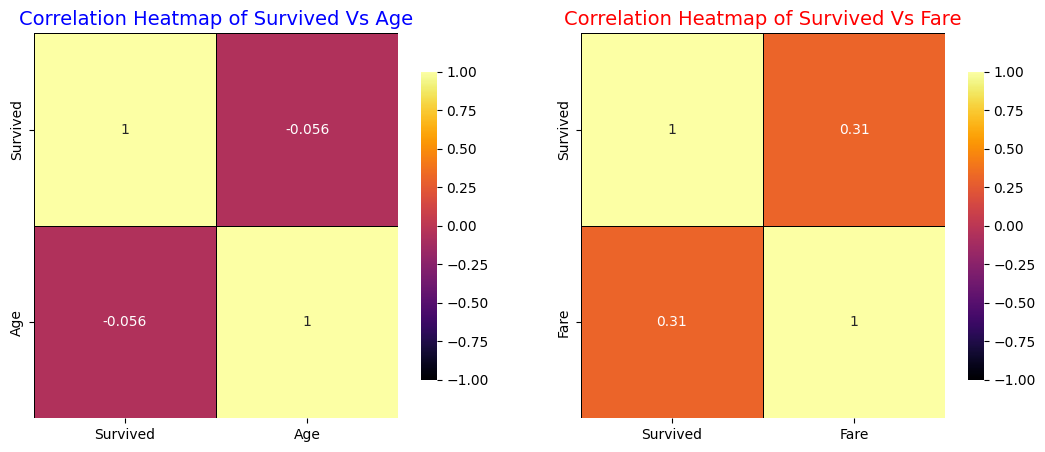

In [37]:
# Creating a boxplot
plt.figure(figsize=(20,5))

# HeatMap Coorelation(1st subplot)
plt.subplot(1,3,1)
corr_matrix = df_no_outliers[['Survived','Age']].corr()
# Create a heatmap
# Create heatmap using seaborn's heatmap() function
sns.heatmap(
    corr_matrix, # The correlation matrix
    annot=True, # Annotate each cell with the numeric value
    cmap='inferno', # Color map (coolwarm ranges from blue for low to red for high correlation)
 # try these themes for cmap: Blues, BuGn, BuPu, magma,inferno,plasma
    linewidths=0.5, # Width of the lines that will divide each cell
    linecolor='black', # Color of the lines dividing cells
    vmin=-1, # Minimum color scale value (for -1 correlation)
    vmax=1, # Maximum color scale value (for 1 correlation)
    cbar_kws={"shrink": 0.8} # Customize color bar (shrink it slightly)
)
# Title for the heatmap plot
# Change the title color to 'blue' and adjust font size
plt.title('Correlation Heatmap of Survived Vs Age', color='blue', fontsize=14)

# HeatMap Coorelation(2nd subplot)
plt.subplot(1,3,2)
corr_matrix = df_no_outliers[['Survived','Fare']].corr()
# Create a heatmap
# Create heatmap using seaborn's heatmap() function
sns.heatmap(
    corr_matrix, # The correlation matrix
    annot=True, # Annotate each cell with the numeric value
    cmap='inferno', # Color map (coolwarm ranges from blue for low to red for high correlation)
 # try these themes for cmap: Blues, BuGn, BuPu, magma,inferno,plasma
    linewidths=0.5, # Width of the lines that will divide each cell
    linecolor='black', # Color of the lines dividing cells
    vmin=-1, # Minimum color scale value (for -1 correlation)
    vmax=1, # Maximum color scale value (for 1 correlation)
    cbar_kws={"shrink": 0.8} # Customize color bar (shrink it slightly)
)
# Title for the heatmap plot
# Change the title color to 'blue' and adjust font size
plt.title('Correlation Heatmap of Survived Vs Fare', color='red', fontsize=14)

# Show the plot
plt.show()